In [48]:
from rosbags.rosbag1 import Reader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted
import glob
from IPython.display import display
from rosbags.serde import deserialize_cdr, ros1_to_cdr

plt.style.use('default')

In [60]:
from functools import reduce
with Reader(natsorted(glob.glob('data/*.bag'))[-1]) as reader:
    topics = ['/robot1/joint_states', '/robot1/joint_command']
    D = { t: {} for t in topics }
    for connection, timestamp, rawdata in reader.messages(connections=[a for a in reader.connections if a.topic in topics]):
        msg = deserialize_cdr(ros1_to_cdr(rawdata, connection.msgtype), connection.msgtype)
        E = D[connection.topic]
        for n, d in zip(msg.name, msg.position):
            if n not in E:
                E[n] = []
            E[n].append((msg.header.stamp.sec + msg.header.stamp.nanosec * 1E-9, d))
    

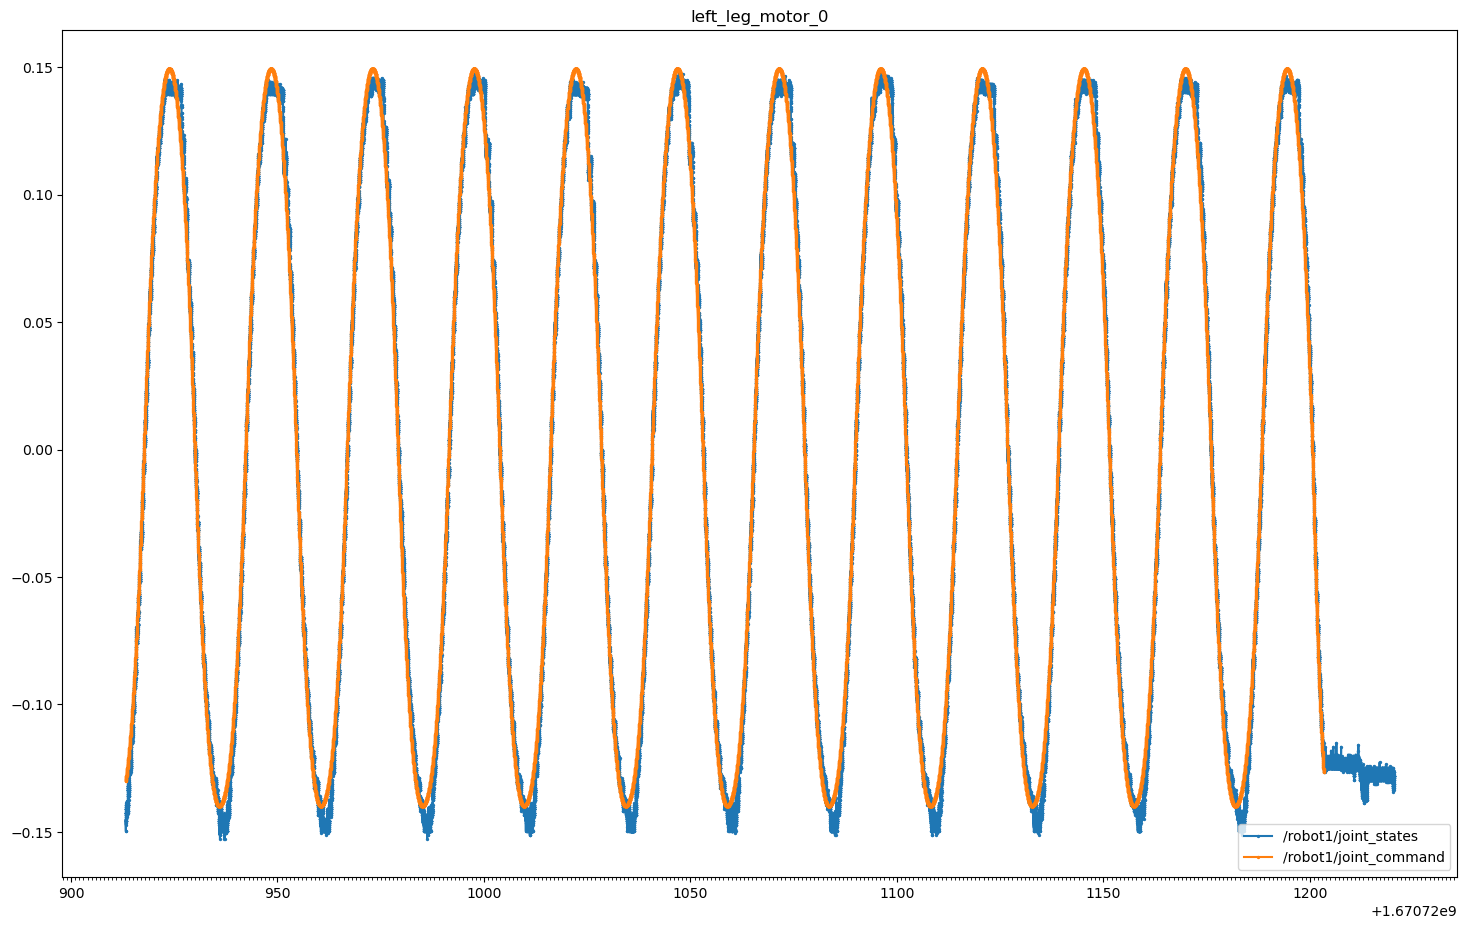

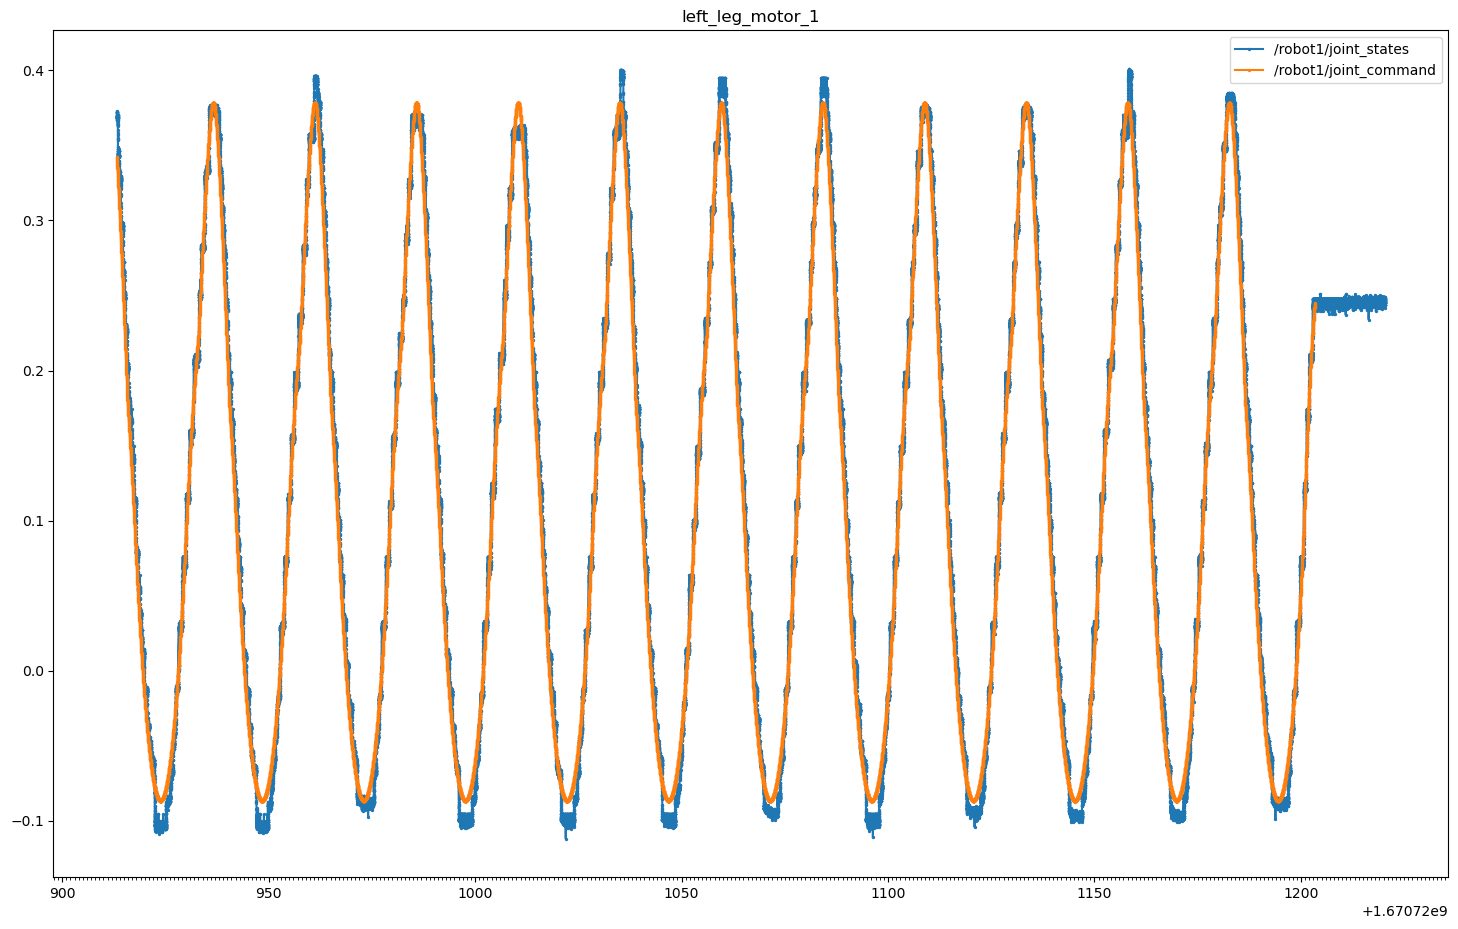

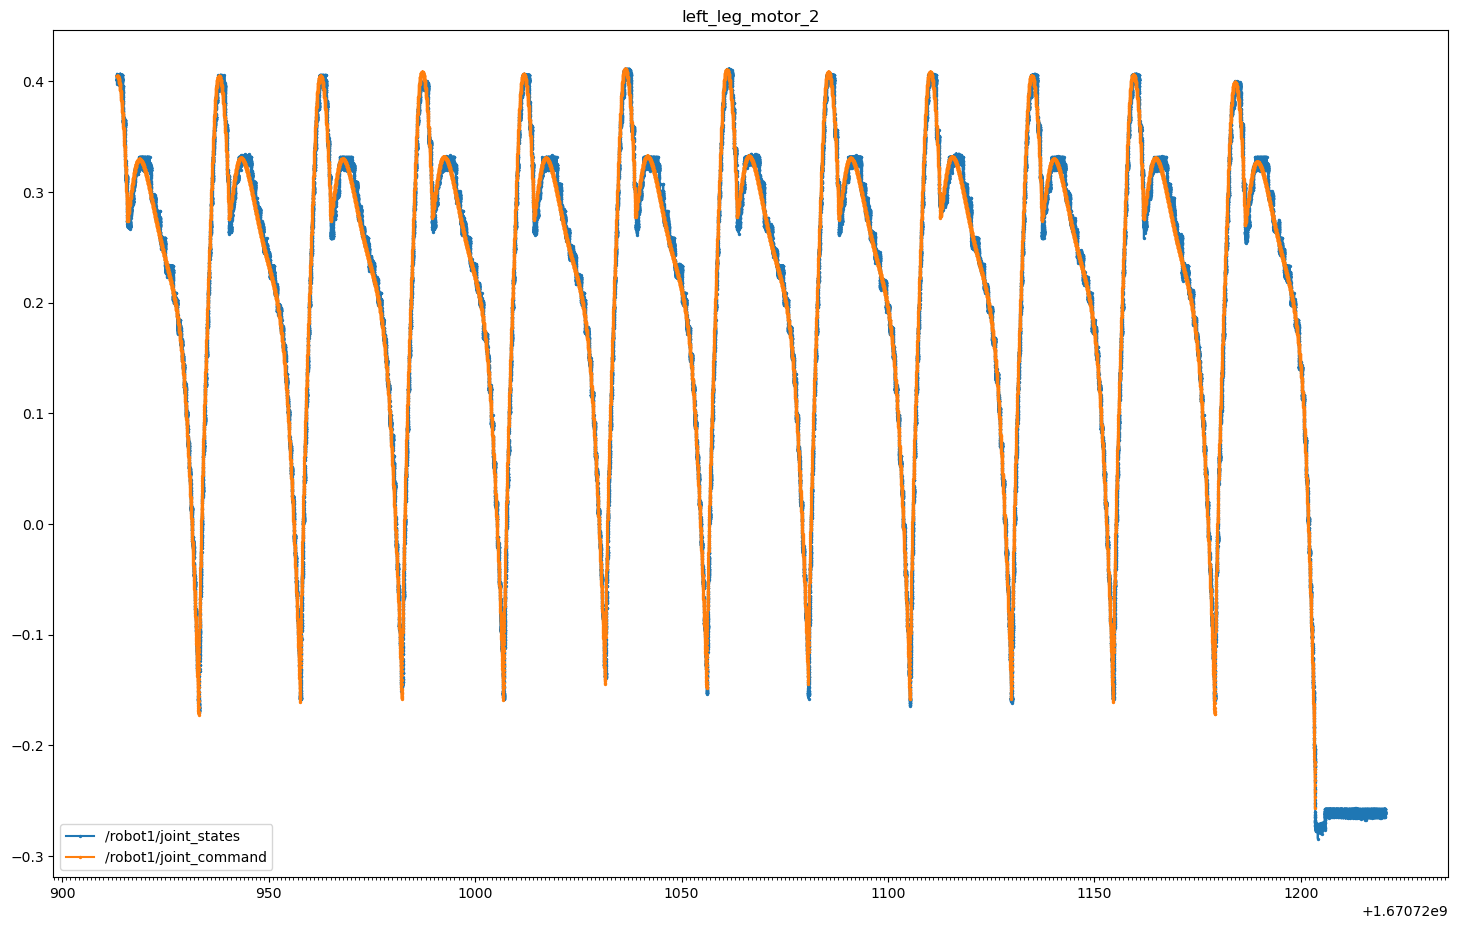

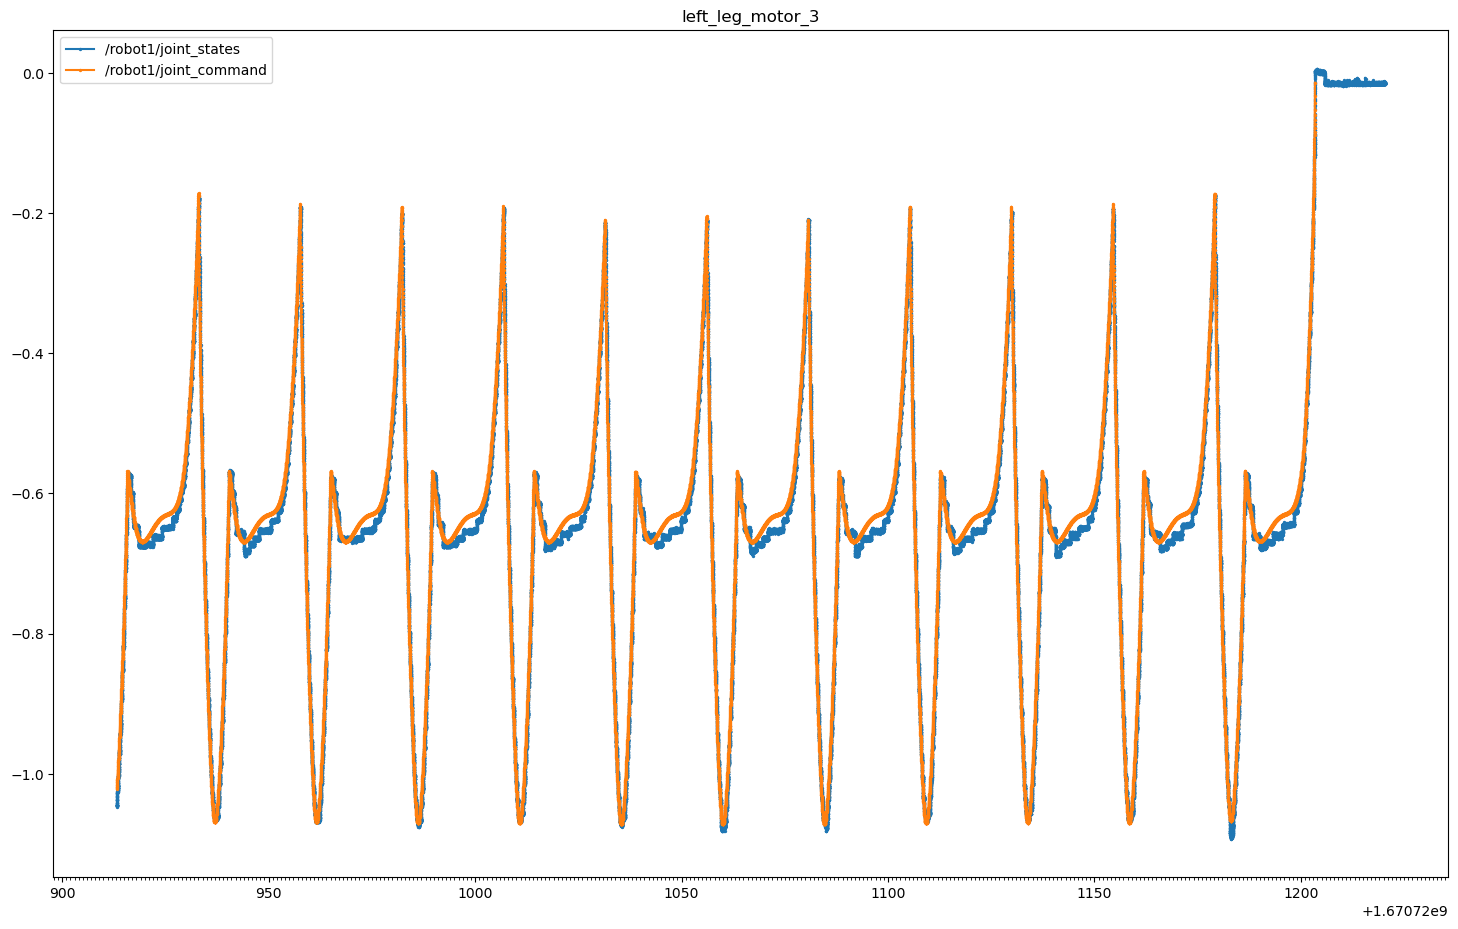

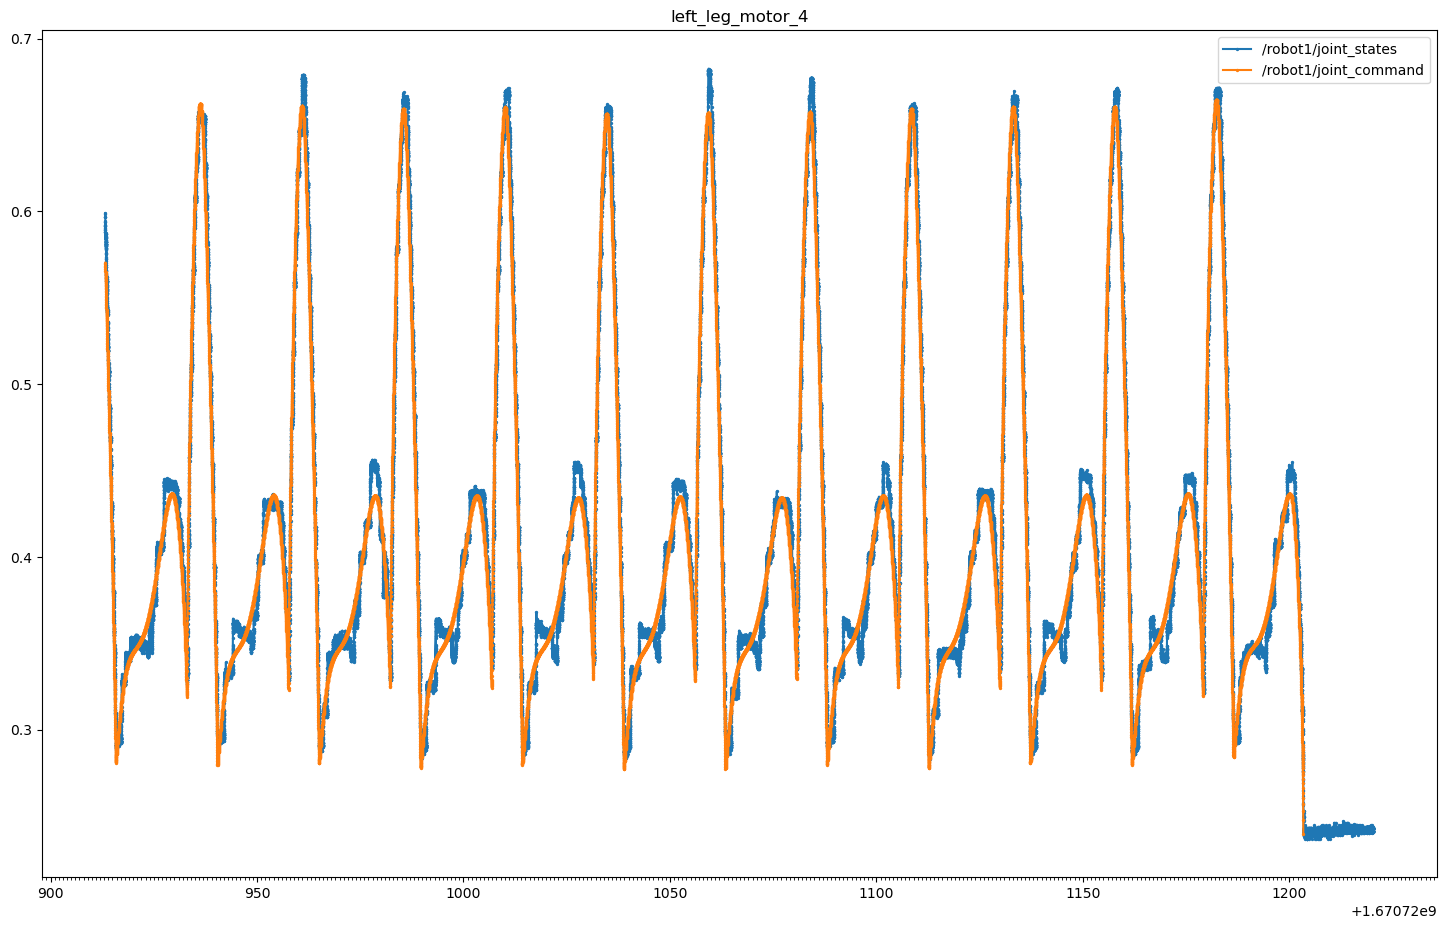

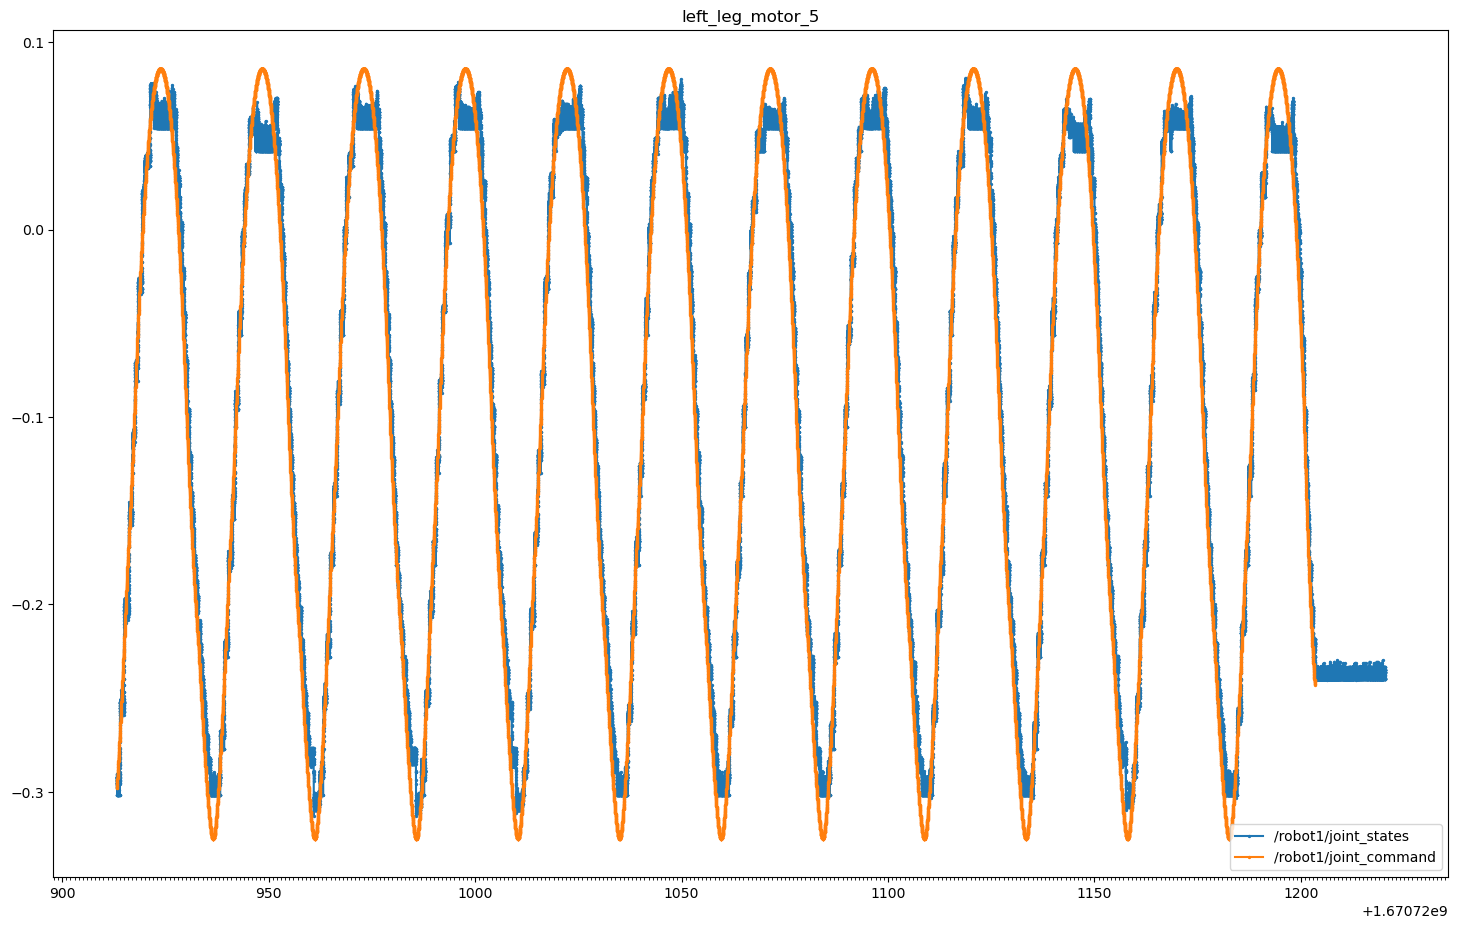

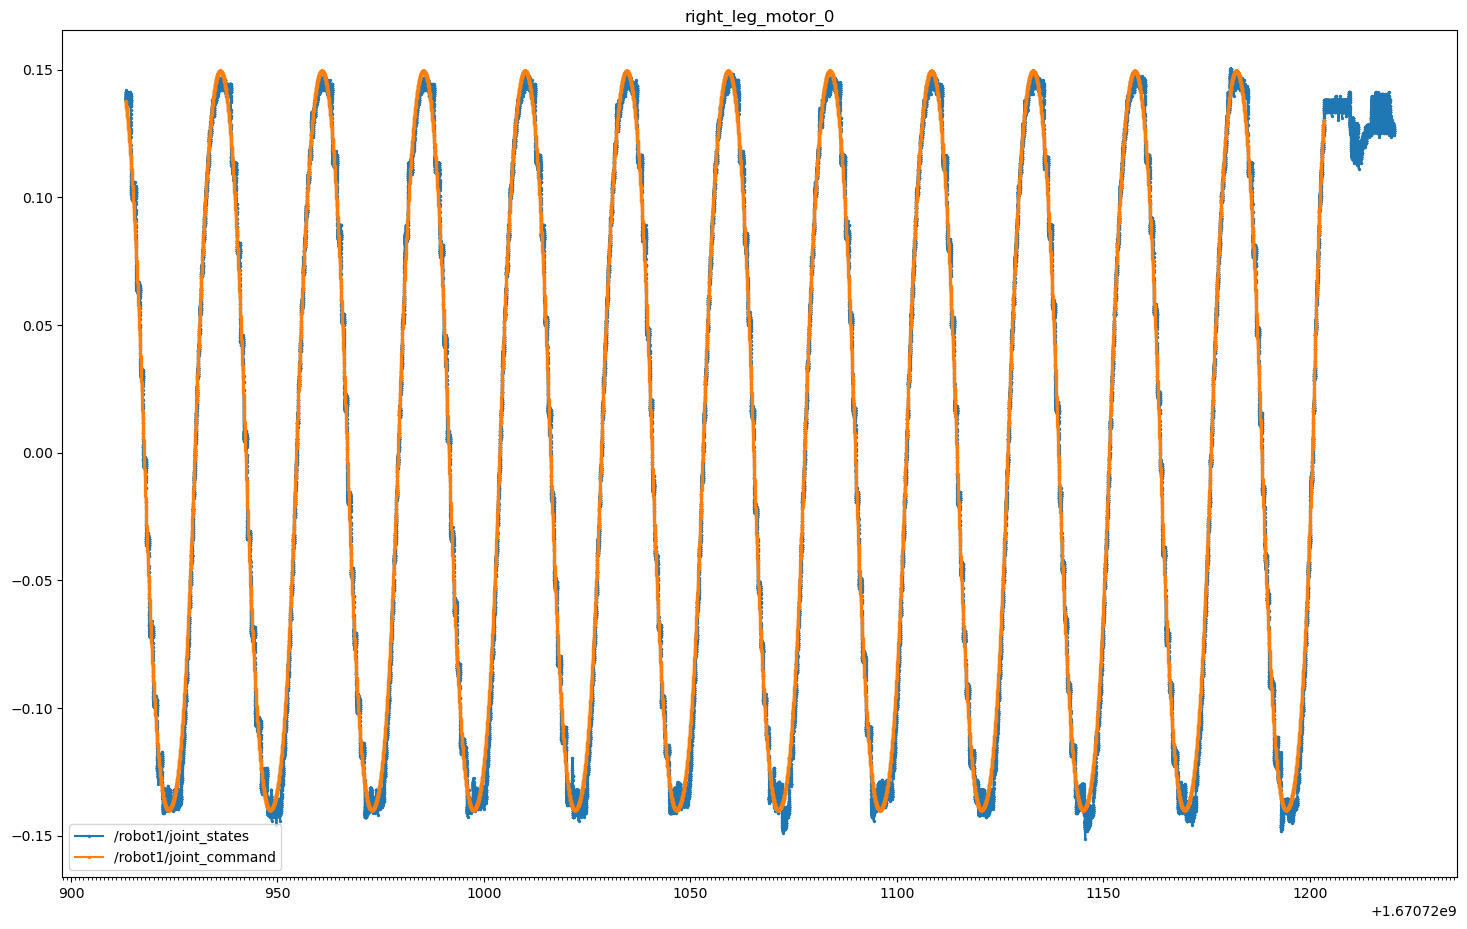

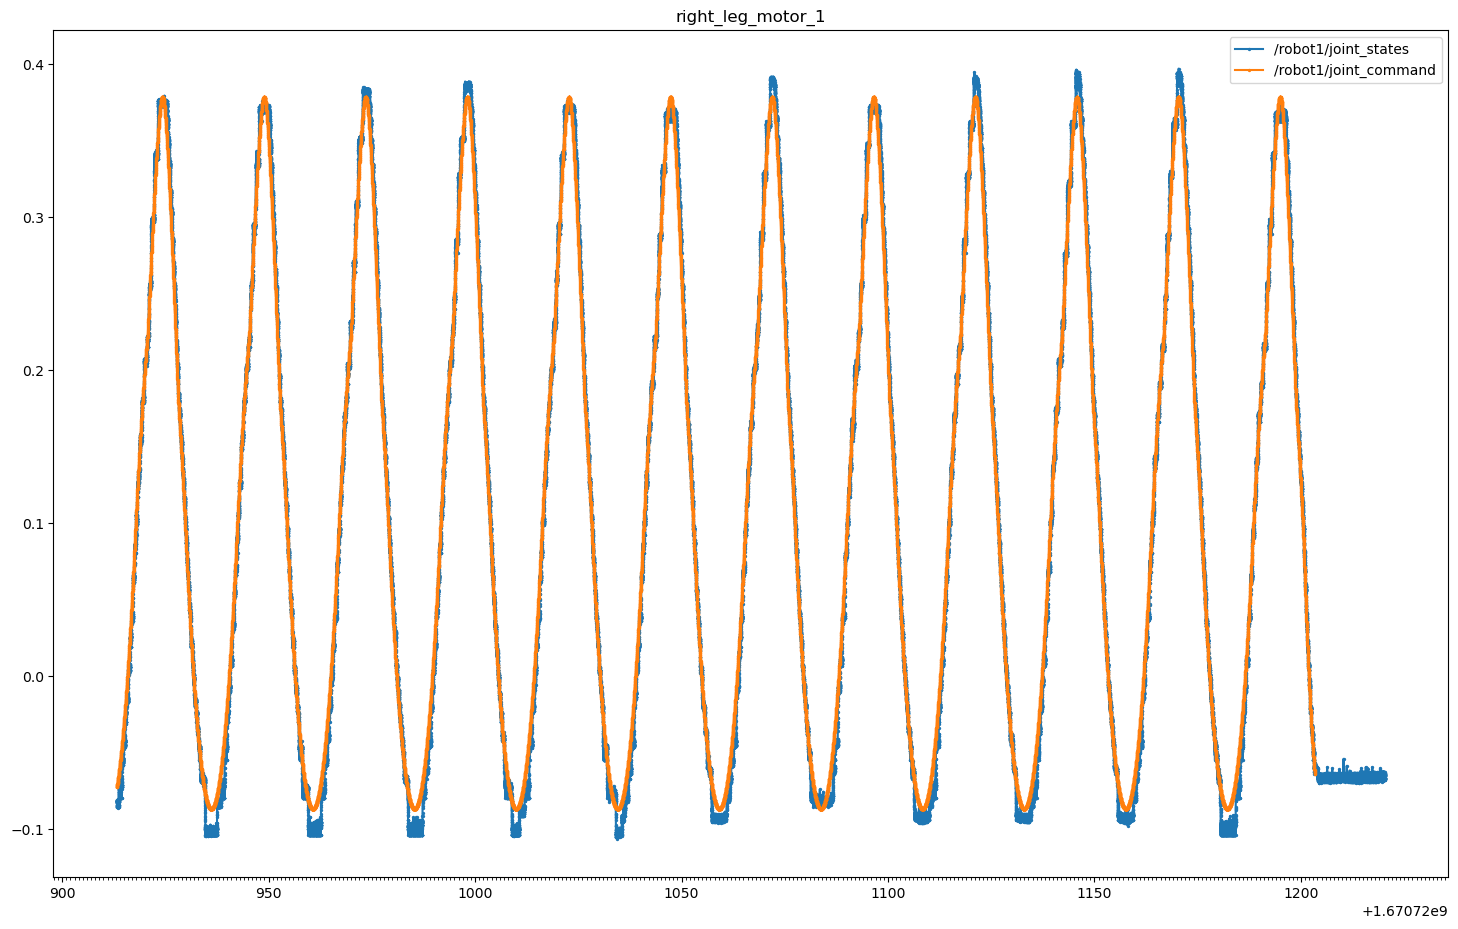

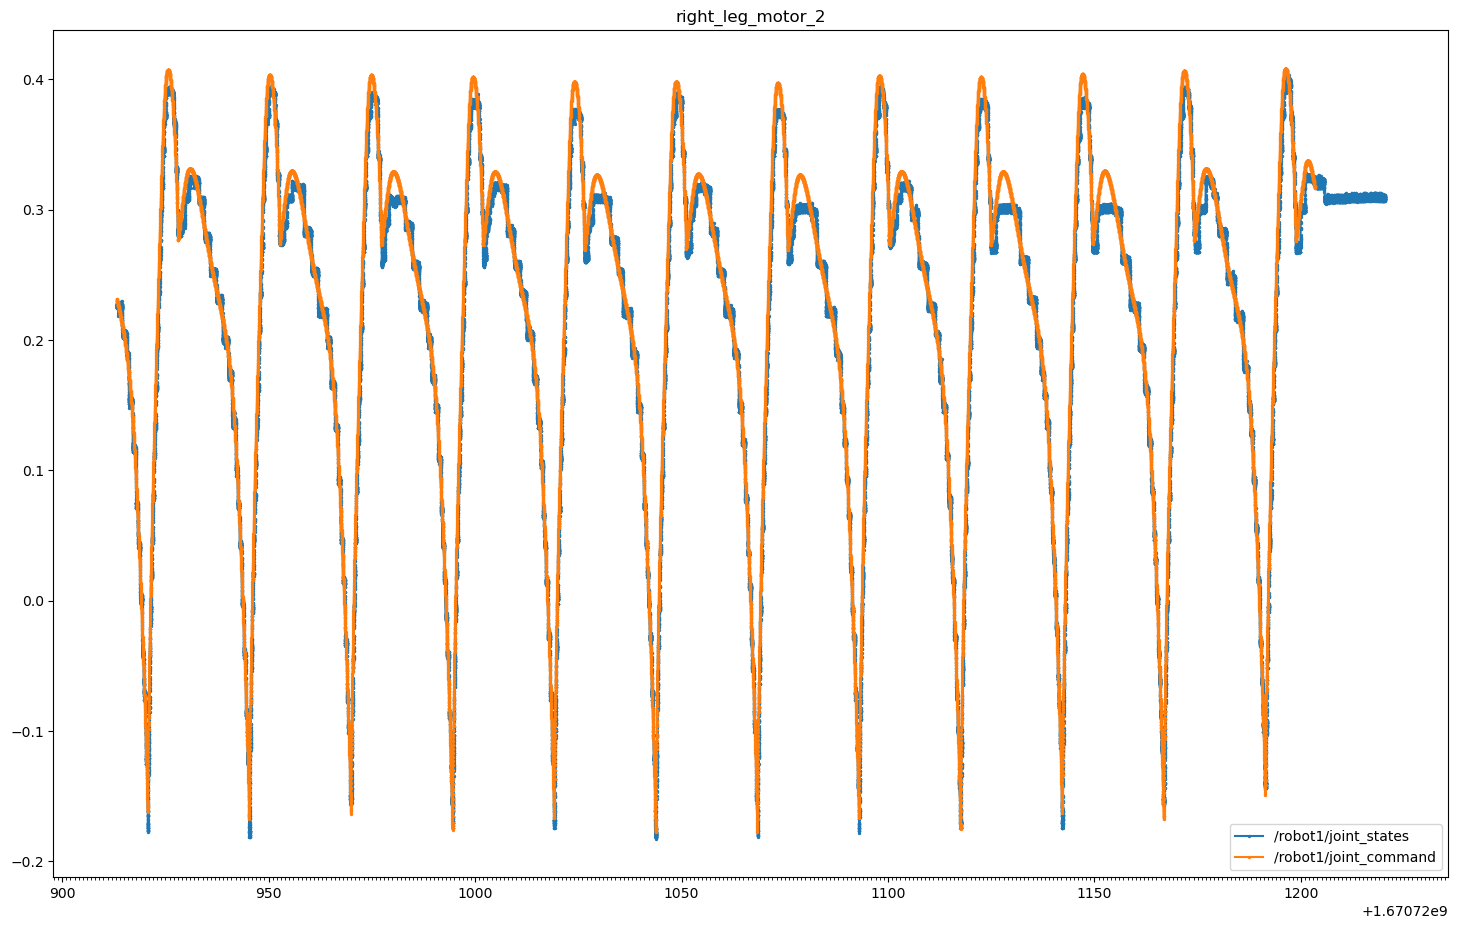

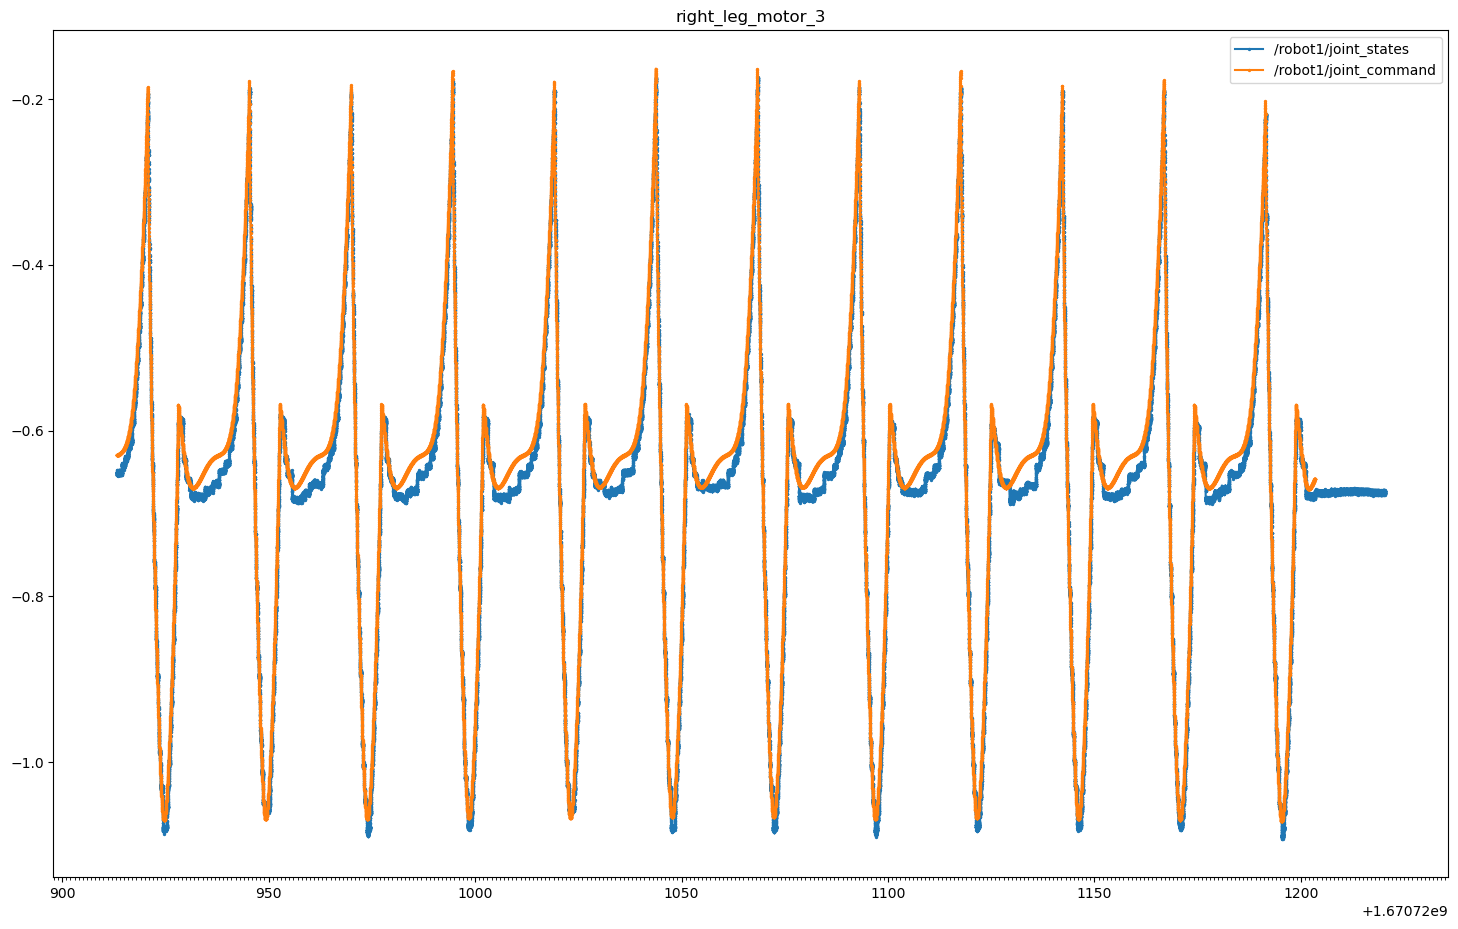

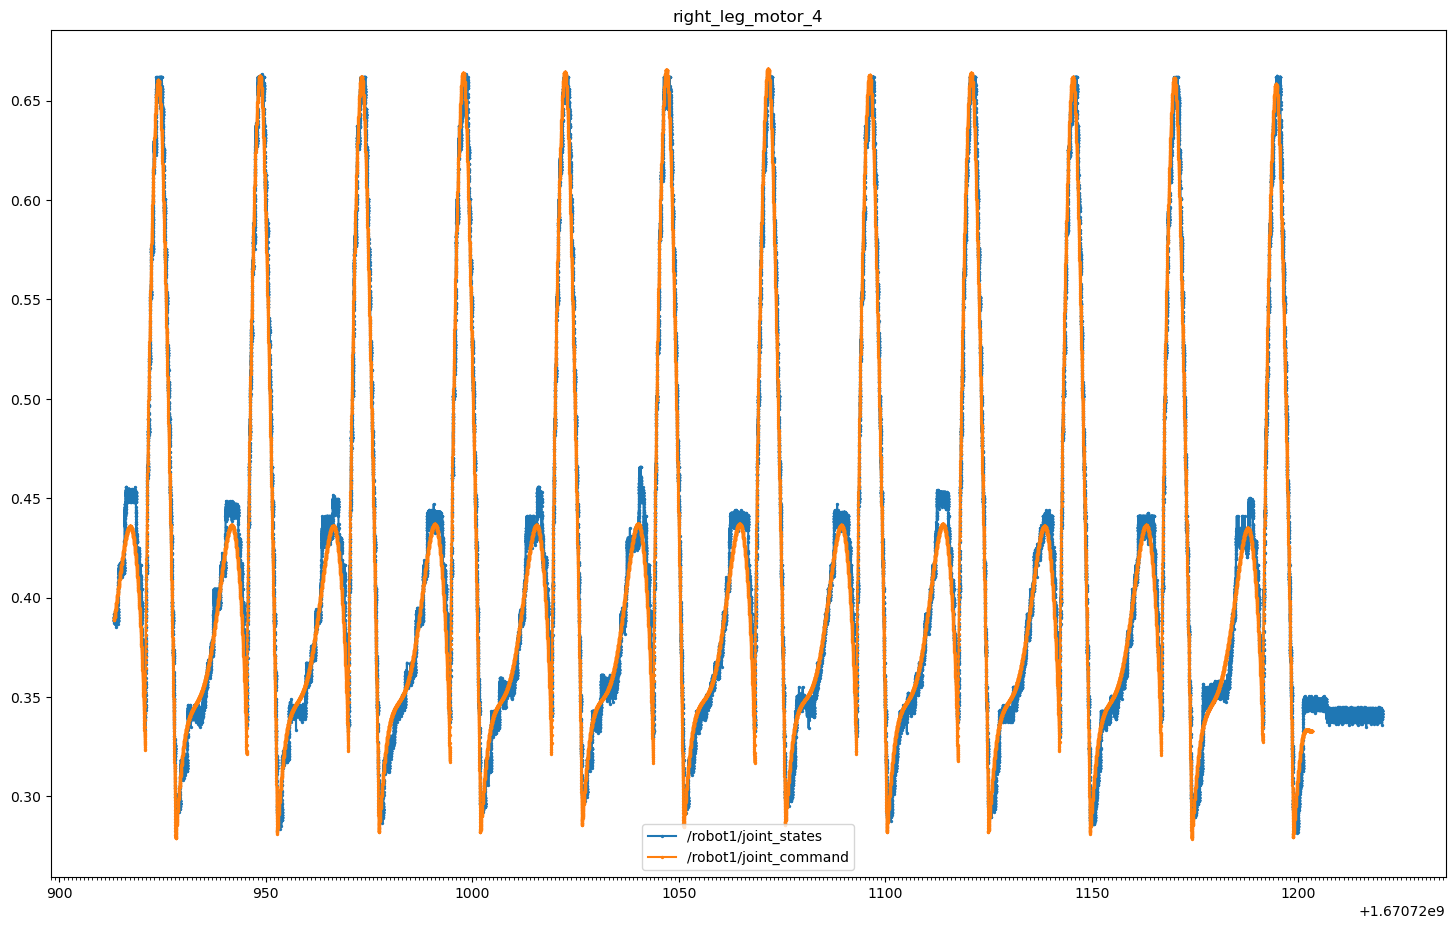

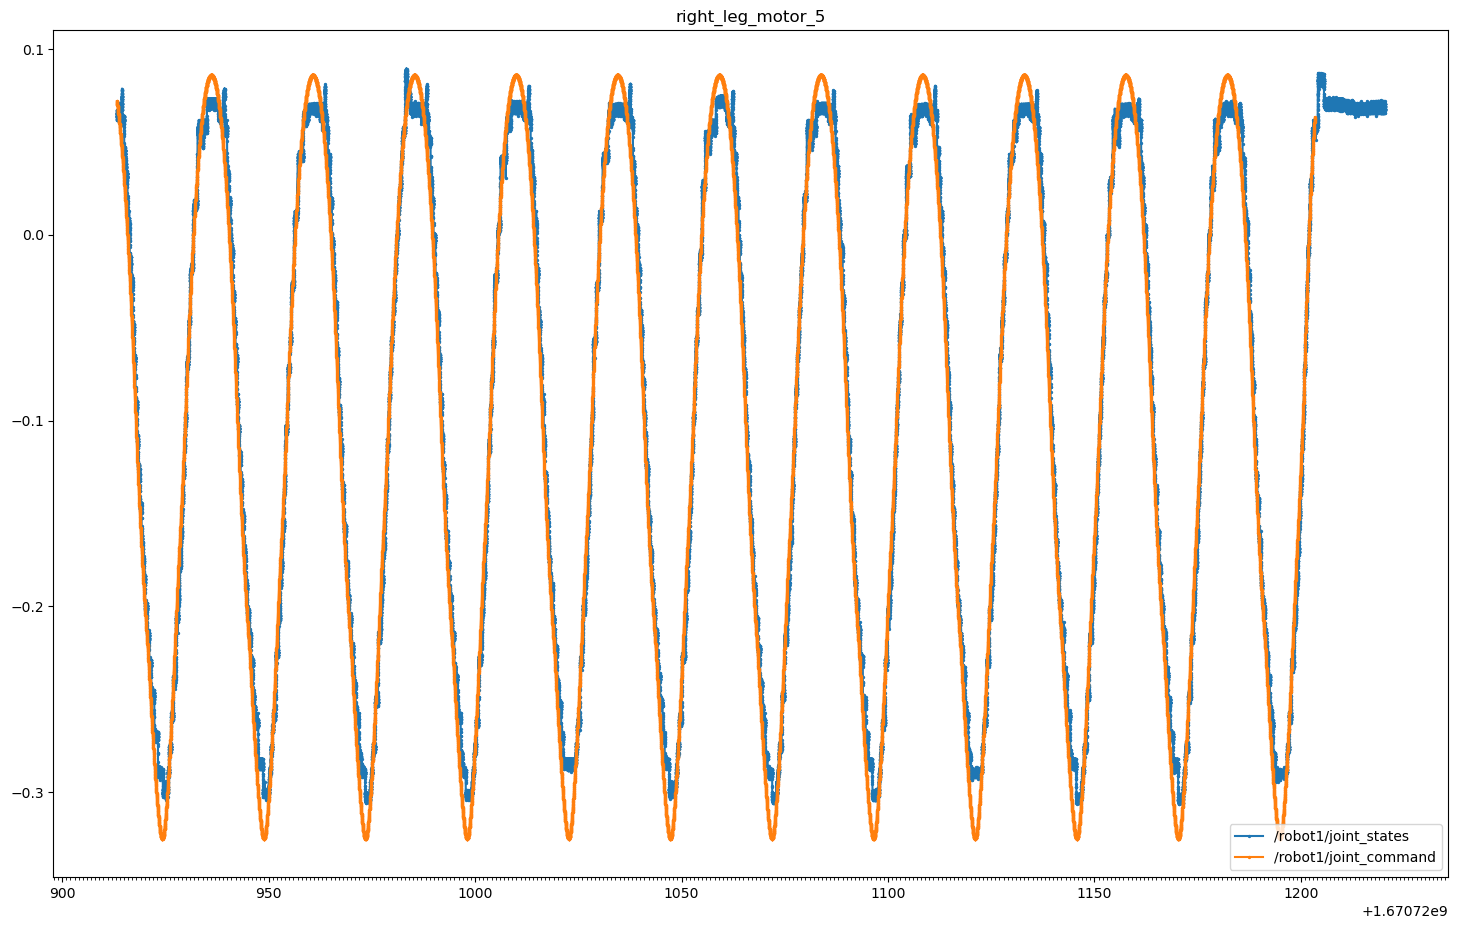

In [61]:
import re
for k in natsorted([a for a in reduce(lambda a, b: a | b.keys(), D.values(), set()) if re.match(r'.*leg', a)]):
    plt.figure(figsize=(18,11))
    topics = []
    for topic, E in D.items():
        if k in E:
            topics.append(topic)
            plt.plot(*np.array(E[k]).T, marker='o', markersize=1.4)

    plt.title(k)
    plt.legend(topics)
    plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
    plt.legend(topics)

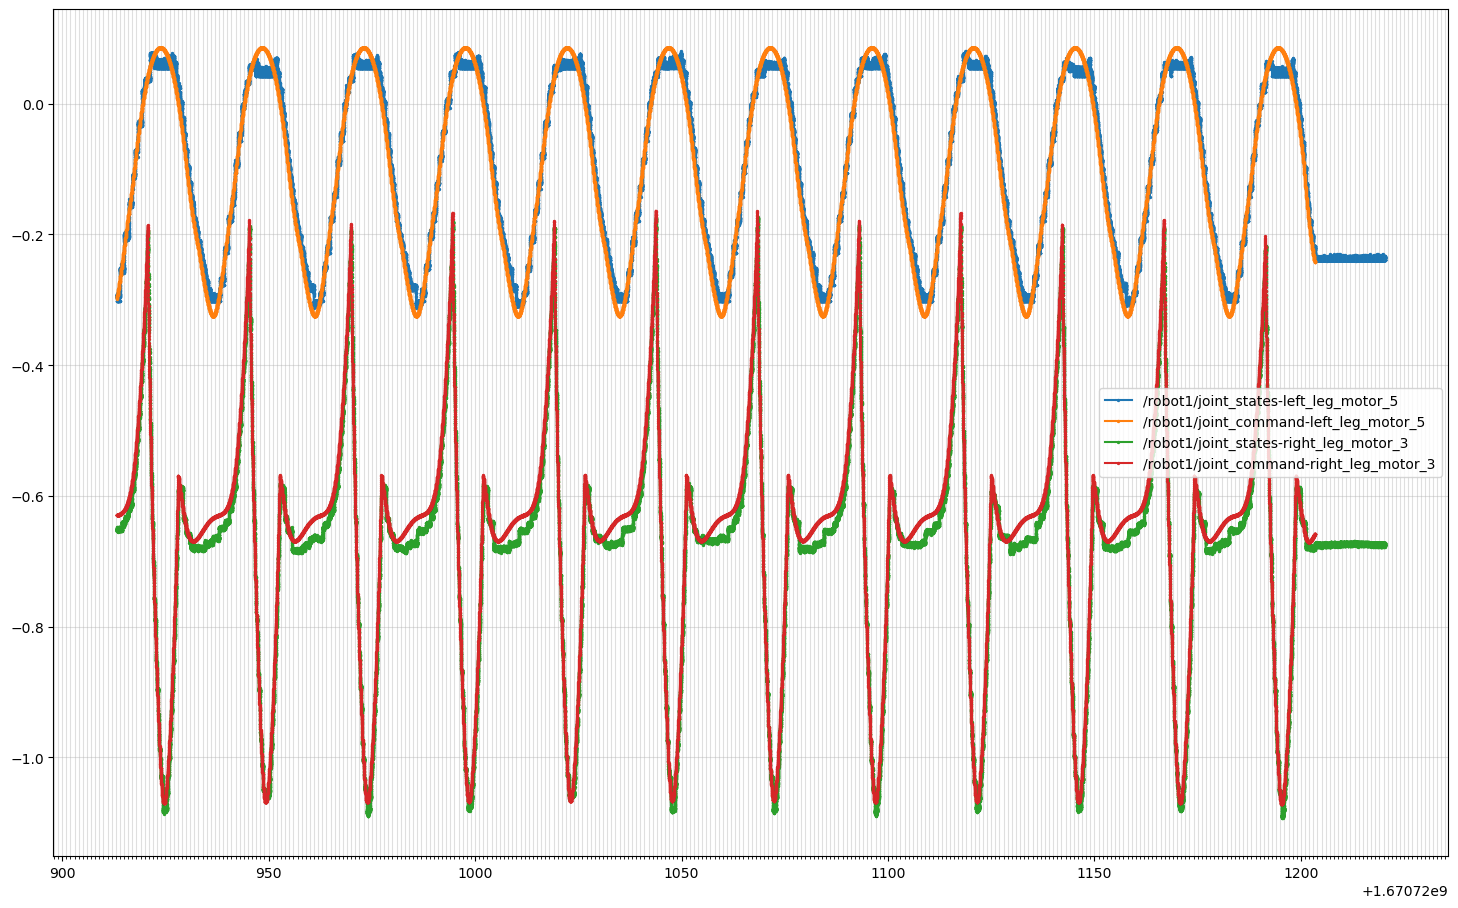

In [65]:
import re
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
plt.figure(figsize=(18,11))
topics = []
for k in natsorted([a for a in reduce(lambda a, b: a | b.keys(), D.values(), set()) if re.match(r'right_leg_motor_3|left_leg_motor_5', a)]):
    for topic, E in D.items():
        if k in E:
            topics.append('%s-%s' % (topic, k))
            plt.plot(*np.array(E[k]).T, marker='o', markersize=1.4)

# plt.title(k)
plt.grid(True, which='both', alpha=0.4)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
plt.legend(topics)